In [2]:
import numpy as np    # for dealing with the data
from sklearn.linear_model import LinearRegression    # to perform the regression
from sklearn.preprocessing import PolynomialFeatures # for polynomials
import pickle         # to retrieve the data
import seaborn as sns                                # to plot the data
import matplotlib.pyplot as plt                      # obtained from regression


# Loading the Pickle files

In [3]:
testfile = open('test_dataset.pickle', 'rb')  # load the test dataset
test_data = pickle.load(testfile)
testfile.close()

trainfile = open('train_dataset.pickle', 'rb') # load the train dataset
train_data = pickle.load(trainfile)
trainfile.close()

np.random.seed(101)                            # shuffle the training data
np.random.shuffle(train_data)                  # using a seed
trainset = np.array(np.array_split(train_data.copy(), 20)) # split the training data into 20 batches

# Tasks $3$ and $4$
## Calculating Bias, Bias<sup>2</sup>, Variance, and Irreducible Error.


In [4]:
def for_each_polynomial(i):        # function that will be called for each poly
    poly = PolynomialFeatures(degree=i)     # degree of polynomial
    def fit_model(arr):                     # fit the given X values to the y values
        X = arr[:,0].reshape(-1,1)          # reshaping because lr.fit() requires a 2D array
        X_t = poly.fit_transform(X)         # transforming according to the degree of polynomial
        y = arr[:,1]                        
        lr = LinearRegression().fit(X_t, y) # fitting
        test_X = test_data[:,0].reshape(-1,1) 
        test_X_t = poly.fit_transform(test_X)
        predicted_y =  ((lr.predict(test_X_t))) # predicts y values based on training X values
        return predicted_y                      # returns a list of 200 y values
            
            
    test_y = test_data[:,1] # array of real y values
    predicted_values = np.array(list(map(fit_model, trainset))) # array of 20 prediction arrays
    avg_predicted_y = np.mean(predicted_values, axis = 0) # mean of 20 predictions (is array of len 200) (is f_hat)

    bias_array = avg_predicted_y - test_y # bias for each test datapoint
    bias = np.mean(bias_array) # mean over 200 data points
    bias_of_abs = np.mean(np.absolute(bias_array)) # bias considering absolute difference

    bias_sq = np.mean(np.square(bias_array))  # bias^2
    
    # refer to the formulae
    variance_array = np.mean(np.square(np.array(list(map(lambda arr: avg_predicted_y - arr, predicted_values))))) 
    variance = np.mean(variance_array) 
    
    mse_array = np.mean(np.square(np.array(list(map(lambda arr: test_y - arr, predicted_values))))) 
    mse = np.mean(mse_array)
    
    ire_array = mse_array - (np.square(bias_array) + variance_array)
    ire = np.mean(ire_array) 

    return bias_of_abs, bias_sq, variance, mse, ire, bias

# Retrieving bias, bias<sup>2</sup>, variance, MSE, and irreducible error

In [5]:
a = np.array(list(map(for_each_polynomial, np.arange(1,16))))   # call the function for degrees 1-15
b_array, bsq_array, var_array, ms_array, ir_array = a[:,0], a[:,1], a[:,2], a[:,3], a[:,4] # splitting the array for convenience

# Tabulating all the data

In [6]:
from tabulate import tabulate
headers = ['bias', 'bias^2', 'variance', 'mean squared error', 'irreducible error', 'bias(without abs)']
table = tabulate(a, headers, tablefmt='fancy_outline')
print(table)


╒═══════════╤════════════╤══════════════╤══════════════════════╤═════════════════════╤═════════════════════╕
│      bias │     bias^2 │     variance │   mean squared error │   irreducible error │   bias(without abs) │
╞═══════════╪════════════╪══════════════╪══════════════════════╪═════════════════════╪═════════════════════╡
│ 0.26927   │ 0.114445   │  0.00785544  │           0.1223     │         2.10942e-17 │        -0.0157819   │
│ 0.0863699 │ 0.0121412  │  0.00109592  │           0.0132371  │        -1.80411e-18 │        -0.0164617   │
│ 0.03324   │ 0.00470189 │  0.000379057 │           0.00508094 │        -4.44089e-18 │        -0.0041594   │
│ 0.0245285 │ 0.00425852 │  0.000461525 │           0.00472005 │        -1.94289e-18 │        -0.00455756  │
│ 0.0238292 │ 0.00420495 │  0.000545061 │           0.00475001 │         5.20417e-19 │        -0.00444024  │
│ 0.0243632 │ 0.00418425 │  0.000776679 │           0.00496093 │        -1.04083e-18 │        -0.00363768  │
│ 0.0256472 │ 0.004

# Task $5$: Plotting Bias<sup>2</sup> $-$ Variance graph

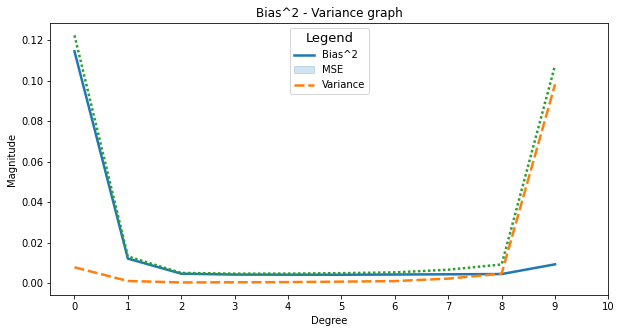

In [7]:
plt.figure(figsize=(10,5))
ax = sns.lineplot(data=a[:,1:4][:10], linewidth=2.5)
ax.set(title='Bias^2 - Variance graph', xlabel='Degree', ylabel='Magnitude', xticks=np.arange(11))
plt.legend(title='Legend', title_fontsize = 13, labels=['Bias^2', 'MSE', 'Variance'])
plt.show()

# <center> End </center>